<a href="https://colab.research.google.com/github/milicak/Data_Analysis_Course/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import random
import matplotlib.pyplot as plt
import xarray as xr

In [1]:
import os                                                 # to set current working directory
from sklearn.decomposition import PCA                     # PCA program from scikit learn (package for machine learning)
from sklearn.preprocessing import StandardScaler          # standardize variables to mean of 0.0 and variance of 1.0
import pandas as pd                                       # DataFrames and plotting
import pandas.plotting as pd_plot                         # matrix scatter plots
import numpy as np                                        # arrays and matrix math
import matplotlib.pyplot as plt                           # plotting
from matplotlib.ticker import AutoMinorLocator            # gridlines
from matplotlib.gridspec import GridSpec
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interactive, interact              # widgets and interactivity
from ipywidgets import widgets
from ipywidgets import Layout
from ipywidgets import Label
import matplotlib.transforms as transforms
import math
from ipywidgets import VBox, HBox
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
cmap = plt.cm.inferno
plt.rc('axes', axisbelow=True)

In [2]:
def add_grid():
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks

def add_grid2(sub_plot):
    sub_plot.grid(True, which='major',linewidth = 1.0); sub_plot.grid(True, which='minor',linewidth = 0.2) # add y grids
    sub_plot.tick_params(which='major',length=7); sub_plot.tick_params(which='minor', length=4)
    sub_plot.xaxis.set_minor_locator(AutoMinorLocator()); sub_plot.yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks

In [11]:
url = 'https://data.giss.nasa.gov/pub/precipdai/precip1900-1988.nc.gz'
!wget -nc {url}

--2025-04-09 18:24:02--  https://data.giss.nasa.gov/pub/precipdai/precip1900-1988.nc.gz
Resolving data.giss.nasa.gov (data.giss.nasa.gov)... 129.164.128.233, 2001:4d0:2310:230::233
Connecting to data.giss.nasa.gov (data.giss.nasa.gov)|129.164.128.233|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11731025 (11M) [application/x-gzip]
Saving to: ‘precip1900-1988.nc.gz’

precip1900-1988.nc. 100%[===================>]  11.19M  3.28MB/s    in 3.6s    

2025-04-09 18:24:06 (3.13 MB/s) - ‘precip1900-1988.nc.gz’ saved [11731025/11731025]



In [14]:
ds = xr.open_dataset('precip1900-1988.nc.gz')
ds

<xarray.Dataset> Size: 49MB
Dimensions:  (lat: 73, lon: 144, year: 89, month: 13)
Coordinates:
  * lat      (lat) float32 292B -88.77 -86.3 -83.84 -81.37 ... 83.84 86.3 88.77
  * lon      (lon) float32 576B -178.8 -176.2 -173.8 ... 173.8 176.2 178.8
  * year     (year) int32 356B 1900 1901 1902 1903 1904 ... 1985 1986 1987 1988
  * month    (month) int32 52B 1 2 3 4 5 6 7 8 9 10 11 12 13
Data variables:
    precip   (year, month, lat, lon) float32 49MB ...
Attributes:
    title:        GISS-DAI Observed Land Surface Precipitation 1900-1988
    institution:  NASA Goddard Institute for Space Studies
    source:       http://data.giss.nasa.gov/precip_dai/
    header:       PRECIP ANOMALIES(MM):2.5DX2.5D,1/1900-12/89,5SIG,CORRECTED
    note:         Month index 13 is the annual mean

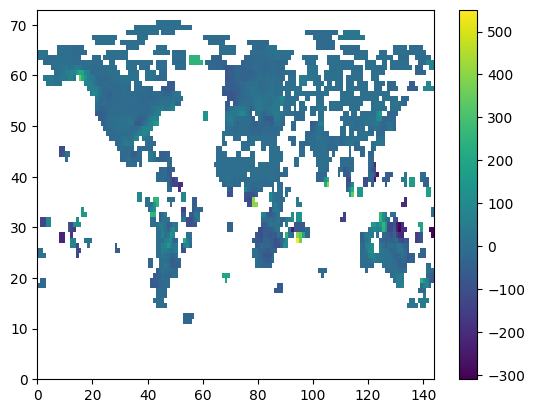

In [16]:
plt.pcolormesh(ds.precip[-2,0,:,:]);plt.colorbar()

--2025-04-09 18:26:59--  https://data.giss.nasa.gov/pub/gistemp/gistemp1200_GHCNv4_ERSSTv5.nc.gz
Resolving data.giss.nasa.gov (data.giss.nasa.gov)... 129.164.128.233, 2001:4d0:2310:230::233
Connecting to data.giss.nasa.gov (data.giss.nasa.gov)|129.164.128.233|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25571774 (24M) [application/x-gzip]
Saving to: ‘gistemp1200_GHCNv4_ERSSTv5.nc.gz’

gistemp1200_GHCNv4_ 100%[===================>]  24.39M  2.89MB/s    in 7.7s    

2025-04-09 18:27:07 (3.16 MB/s) - ‘gistemp1200_GHCNv4_ERSSTv5.nc.gz’ saved [25571774/25571774]



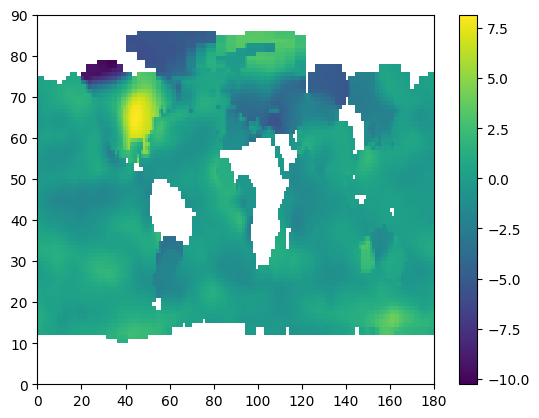

In [17]:
url = 'https://data.giss.nasa.gov/pub/gistemp/gistemp1200_GHCNv4_ERSSTv5.nc.gz'
#The dataset is small enough (23 MB) that it is sufficient to make local copy of the file.
!wget -nc {url}
ds2 = xr.open_dataset('gistemp1200_GHCNv4_ERSSTv5.nc.gz')

In [124]:
ds2 = ds2.sel(time=slice('1978','1988'))
Temp = ds2.tempanomaly[:,71,99]
ds = ds.sel(year=slice('1978','1988'))
Pr = ds.precip[:,:-1,57,84]

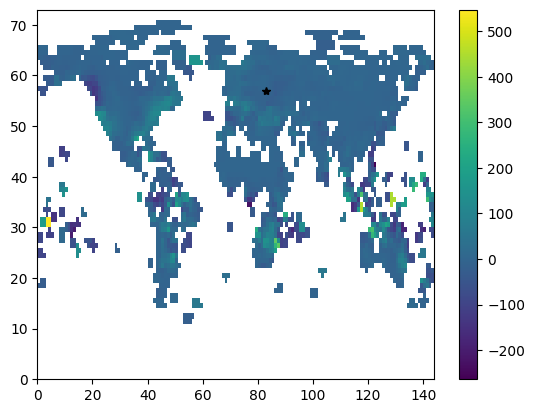

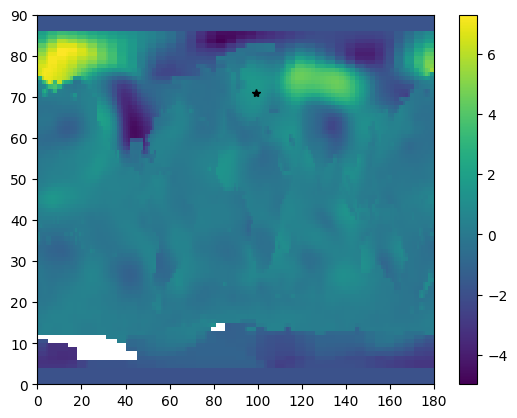

In [125]:
plt.figure(1)
plt.pcolormesh(ds.precip[0,0,:,:]);plt.colorbar()
plt.plot(83,57,'k-*')
plt.figure(2)
plt.pcolormesh(ds2.tempanomaly[0,:,:]);plt.colorbar()
plt.plot(99,71,'k-*')

In [126]:
Temp

<xarray.DataArray 'tempanomaly' (time: 132)> Size: 528B
[132 values with dtype=float32]
Coordinates:
    lat      float32 4B 53.0
    lon      float32 4B 19.0
  * time     (time) datetime64[ns] 1kB 1978-01-15 1978-02-15 ... 1988-12-15
Attributes:
    long_name:     Surface temperature anomaly
    units:         K
    cell_methods:  time: mean

In [127]:
Pr = np.copy(Pr.data)
Pr = Pr.flatten()

In [128]:
df = pd.DataFrame({'Temp':np.copy(Temp),'Pr':Pr})
df

,Temp,Pr
0,1.48,-10.467100
1,-1.57,8.797553
2,1.41,-3.873828
3,-0.80,23.151901
4,-0.55,34.911591
...,...,...
127,0.45,-0.180503
128,0.41,17.168274
129,0.15,-28.142166
130,-2.43,4.569913


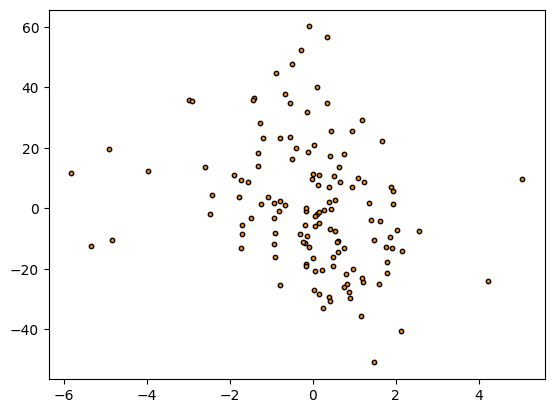

In [129]:
plt.scatter(df['Temp'],df['Pr'],color='darkorange',edgecolor='black',s=10);

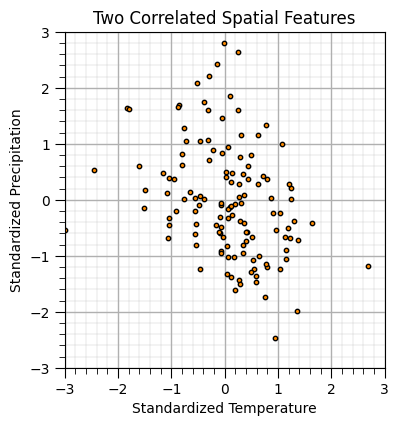

In [130]:
x = StandardScaler().fit(df).transform(df)
plt.scatter(x[:,0],x[:,1],color='darkorange',edgecolor='black',s=10); plt.xlim([-3,3]); plt.ylim([-3,3])
add_grid(); plt.xlabel('Standardized Temperature'); plt.ylabel('Standardized Precipitation'); plt.title('Two Correlated Spatial Features')
norm = x
plt.subplots_adjust(left=0.0, bottom=0.0, right=0.5, top=0.7, wspace=0.1, hspace=0.1); plt.show()

In [ ]:
def dashboard(Angle):

    fig = plt.figure(constrained_layout=False)
    gs = GridSpec(2, 2, figure=fig)

    ax1 = fig.add_subplot(gs[:, 0])

    base = plt.gca().transData
    #print(base)
    rot = transforms.Affine2D().rotate_deg(int(Angle))
    #line=ax16.plot(x[:,0],x[:,1], 'o', transform= rot + base, c = 'black', alpha = 0.3)
    line=ax1.plot(norm[:,0],norm[:,1], 'o', c = 'black', alpha = 0.3)

    xdata=x[:,0]*math.cos(math.radians(int(Angle)))-x[:,1]*math.sin(math.radians(int(Angle)))
    ydata=x[:,1]*math.cos(math.radians(int(Angle)))+x[:,0]*math.sin(math.radians(int(Angle)))

    eigen = np.zeros([2,2])
    eigen[0,0] = math.cos(Angle*math.pi/180.0)
    eigen[1,0] = math.sin(Angle*math.pi/180.0)
    eigen[0,1] = -1*math.sin(Angle*math.pi/180.0)
    eigen[1,1] = math.cos(Angle*math.pi/180.0)

    df2 = pd.DataFrame({'x':xdata, 'y':ydata})
    data = df2.values
    lists=[]

    ydataZeroed = np.zeros(len(ydata))

    rotinv = transforms.Affine2D().rotate_deg(int(-Angle))
    ax1.plot(xdata, ydataZeroed,"or", c = 'red', alpha = 0.3,transform= rotinv + base,label=r'$C_1$')
    ax1.plot(ydataZeroed, ydata,"or", c= 'blue', alpha = 0.3,transform= rotinv + base,label=r'$C_2$')
    ax1.set_xlim(left=-3.5, right=3.5); ax1.set_ylim(bottom=-3.5, top=3.5)
    ax1.set_title("Data and Arbitrary Feature Projection Components"); ax1.set_xlabel(r'Standardized Porosity, $X_1$'); ax1.set_ylabel(r'Standardized TOC, $X_2$')
    ax1.annotate(r'$C_1=X_1 \cdot COS \left(\alpha \cdot \frac{180}{\pi} \right)-X_2 \cdot SIN \left(\alpha \cdot \frac{180}{\pi} \right)$',(-3.0,-2.5))
    ax1.annotate(r'$C_2=X_1 \cdot SIN \left(\alpha \cdot \frac{180}{\pi} \right)+X_2 \cdot COS \left(\alpha \cdot \frac{180}{\pi} \right)$',(-3.0,-2.8))

    add_grid2(ax1); ax1.legend(loc='lower right')
    sizes = []

#     print('Your Estimated Principal Component/Eigen Vector #1 = ' + str(eigen[:,0]))
#     print('Your Estimated Principal Component/Eigen Vector #2 = ' + str(eigen[:,1]))

    sumOfVariance=df2.var()['x']+df2.var()['y']
    sizes.append(df2.var()['x']/sumOfVariance)
    sizes.append(df2.var()['y']/sumOfVariance)

    ax2 = fig.add_subplot(gs[0, 1])

    n = ax2.pie(sizes, autopct='%1.1f%%',colors = ['lightcoral','royalblue'],shadow=True,startangle=90)
    n[0][0].set_alpha(1.0); n[0][1].set_alpha(1.0)
    ax2.axis('equal')
    labels = [r'$\frac{\sigma_{C_1}^2}{\sigma_{X_1+X_2}^2}$', r'$\frac{\sigma_{C_2}^2}{\sigma_{X_1+X_2}^2}$']
    ax2.legend(sizes, labels=labels,loc='upper left')
    ax2.set_title('Components\' Proportion of Variance')
#    plt.tight_layout()


    ax3 = fig.add_subplot(gs[1, 1])
    nAngle = 30
    var_pc1 = np.zeros(nAngle); var_pc2 = np.zeros(nAngle); corr = np.zeros(nAngle)

    for iAngle, lAngle in enumerate(np.linspace(0,180,nAngle)):
        xdata=x[:,0]*math.cos(math.radians(int(lAngle)))-x[:,1]*math.sin(math.radians(int(lAngle)))
        ydata=x[:,1]*math.cos(math.radians(int(lAngle)))+x[:,0]*math.sin(math.radians(int(lAngle)))
        var_pc1[iAngle] = np.var(xdata); var_pc2[iAngle] = np.var(ydata)
        corr[iAngle] = np.corrcoef(xdata,ydata)[0,1]

    ax3.plot(np.linspace(0,180,nAngle),var_pc1/np.full((nAngle),2.0)-0.006,color='red',lw=2)
    ax3.plot(np.linspace(0,180,nAngle),var_pc1/np.full((nAngle),2.0)+0.006,color='teal',lw=2)
    #ax3.plot(np.linspace(0,180,nAngle),var_pc2/np.full((nAngle),2.0),color='blue',lw=2,label = r'Prop $\sigma_{x_2}^2$')
    ax3.fill_between(np.linspace(0,180,nAngle),var_pc1/np.full((nAngle),2.0),np.full((nAngle),0.0),color='red',alpha=0.4,label = r'$\frac{\sigma_{C_1}^2}{\sigma_{X_1+X_2}^2}$',zorder=2)
    ax3.fill_between(np.linspace(0,180,nAngle),np.full((nAngle),1.0),var_pc1/np.full((nAngle),2.0),color='blue',alpha=0.4,label = r'$\frac{\sigma_{C_2}^2}{\sigma_{X_1+X_2}^2}$',zorder=2)
    ax3.plot([Angle,Angle],[0,1.0],color='black',lw=3,ls='--',zorder=500)

    ax4 = ax3.twinx()
    ax4.plot(np.linspace(0,180,nAngle),corr,color='black',lw=4,label = r'$\rho_{C_1,C_2}$',zorder=101)
    ax4.plot(np.linspace(0,180,nAngle),corr,color='white',lw=6,zorder=100)
    ax4.plot([0,180],[0,0],color='black',lw=2,zorder=101)
    ax4.plot([0,180],[0,0],color='white',lw=4,zorder=100)
    add_grid2(ax3); plt.xlim([0,180]); ax3.set_ylabel('Proportion of Variance ($C_1$|$C_2$)')
    ax3.set_ylim([0,1]); ax4.set_ylim([-1,1]); ax3.legend(loc='lower left'); ax4.legend(loc='lower right')
    ax4.set_ylabel('Correlation'); ax3.set_title('Components\' Variance Proportions and Correlation for all Angles')
    ax3.set_xlabel(r'Rotation Angle ($\alpha$)')
    newYlabel = ['0.0|1.0','0.2|0.8','0.4|0.6','0.6|0.4','0.8|0.2','1.0|0.0']
    ax3.set_yticklabels(newYlabel)
    plt.subplots_adjust(left=0.0, bottom=0.0, right=1.8, top=1.1, wspace=0.2, hspace=0.1); plt.show()

title = widgets.Text(value='                           Understanding PCA with an Interactive Orthogonal Feature Projection, Professor Michael J. Pyrcz, The University of Texas at Austin',layout=Layout(width='950px', height='30px'))
style = {'description_width': 'initial'}
widget_angle = widgets.IntSlider(min=0, max = 180, value = 0, step = 5, description = r'Rotation Angle ($\alpha$)',orientation='horizontal',continuous_update=False,layout=Layout(width='950px', height='30px'),style=style)
uik2 = widgets.VBox([title,widget_angle],)
interactive_plot = widgets.interactive_output(dashboard, {'Angle': widget_angle})
interactive_plot.clear_output(wait = True)               # reduce flickering by delaying plot updating
display(uik2,interactive_plot)